In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 79 kB 4.8 MB/s 
     |████████████████████████████████| 4.0 MB 19.8 MB/s 
     |████████████████████████████████| 1.2 MB 44.5 MB/s 
     |████████████████████████████████| 77 kB 4.6 MB/s 
     |████████████████████████████████| 6.6 MB 32.2 MB/s 
     |████████████████████████████████| 895 kB 47.6 MB/s 
     |████████████████████████████████| 596 kB 42.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=28e79213a56d3c8cc85944ea64a8e7a1f1f6129ed2aa49ec1ad0d871f1bf7bd5
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [ ]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')


Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/555 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/505 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_san.csv to sample_san.csv


In [ ]:
import io
import pandas as pd
import numpy as np
df = pd.read_csv(io.BytesIO(uploaded['sample_san.csv']))

In [ ]:
df

,0
0,_transform_arg_helper
1,average_token_age_consumed_in_days
2,burn_rate
3,daily_active_deposits
4,emerging_trends
...,...
803,dev_activity
804,dev_activity_contributors_count
805,github_activity
806,github_activity_contributors_count


In [ ]:
df = df.replace('_',' ',regex =True)

In [ ]:
corpus = df.values.tolist()

In [ ]:
import itertools

corpus = list(itertools.chain(*corpus))

[' transform arg helper',
 'average token age consumed in days',
 'burn rate',
 'daily active deposits',
 'emerging trends',
 'eth spent over time',
 'eth top transactions',
 'exchange funds flow',
 'gas used',
 'get api calls made',
 'historical balance',
 'history twitter data',
 'miners balance',
 'mining pools distribution',
 'mvrv ratio',
 'news',
 'nvt ratio',
 'ohlc',
 'ohlcv',
 'price volume difference',
 'prices',
 'projects',
 'realized value',
 'social dominance',
 'social volume',
 'social volume projects',
 'token age consumed',
 'token circulation',
 'token top transactions',
 'token velocity',
 'top holders percent of total supply',
 'top social gainers losers',
 'top transfers',
 'topic search',
 'uniswap top claimers',
 'eth2 unlabeled staker inflow sources',
 'eth2 staked amount per label',
 'price histogram',
 'eth2 staked address count per label',
 'all spent coins cost',
 'age distribution',
 'eth2 top stakers',
 'spent coins cost',
 'contract transactions count',


In [ ]:
corpus = [
             "Vodafone Wins ₹ 20,000 Crore Tax Arbitration Case Against Government",
             "Voda Idea shares jump nearly 15% as Vodafone wins retro tax case in Hague",
             "Gold prices today fall for 4th time in 5 days, down ₹6500 from last month high",
             "Silver futures slip 0.36% to Rs 59,415 per kg, down over 12% this week",
             "Amazon unveils drone that films inside your home. What could go wrong?",
             "IPHONE 12 MINI PERFORMANCE MAY DISAPPOINT DUE TO THE APPLE B14 CHIP",
             "Delhi Capitals vs Chennai Super Kings: Prithvi Shaw shines as DC beat CSK to post second consecutive win in IPL",
             "French Open 2020: Rafael Nadal handed tough draw in bid for record-equaling 20th Grand Slam"
]

In [ ]:
corpus_embeddings = embedder.encode(corpus)

In [ ]:
# Then, we perform k-means clustering using sklearn:
from sklearn.cluster import KMeans

num_clusters = 8
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [ ]:
cluster_assignment

array([2, 3, 0, 0, 0, 0, 0, 5, 0, 0, 5, 7, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 7, 7, 7, 0, 3, 7, 0, 0, 7, 0, 7, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5,
       5, 5, 5, 0, 5, 0, 7, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0,
       0, 1, 6, 0, 2, 5, 0, 6, 3, 2, 2, 5, 4, 6, 0, 1, 3, 5, 6, 2, 4, 5,
       2, 6, 0, 0, 0, 7, 7, 3, 5, 6, 5, 4, 6, 4, 6, 3, 3, 0, 5, 6, 3, 7,
       6, 0, 1, 4, 3, 0, 3, 6, 7, 7, 3, 5, 2, 2, 2, 7, 6, 0, 0, 4, 0, 0,
       1, 6, 3, 6, 0, 1, 2, 3, 2, 0, 5, 7, 3, 2, 0, 3, 2, 5, 2, 0, 2, 0,
       5, 5, 0, 5, 3, 7, 0, 2, 2, 7, 4, 2, 0, 6, 0, 3, 0, 0, 5, 0, 0, 4,
       0, 2, 6, 7, 1, 0, 5, 5, 4, 2, 7, 2, 6, 0, 0, 1, 3, 2, 6, 7, 4, 2,
       2, 0, 2, 1, 5, 3, 3, 5, 5, 0, 5, 3, 0, 5, 0, 4, 0, 0, 3, 7, 3, 3,
       1, 7, 0, 2, 5, 6, 1, 0, 0, 7, 5, 5, 0, 6, 0, 3, 0, 2, 4, 2, 1, 7,
       3, 6, 3, 5, 2, 3, 5, 6, 0, 3, 3, 5, 5, 1, 0, 2, 5, 1, 0, 1, 0, 3,
       1, 1, 4, 5, 0, 5, 6, 0, 2, 3, 1, 0, 0, 4, 3,

In [ ]:
import matplotlib.pyplot as plt

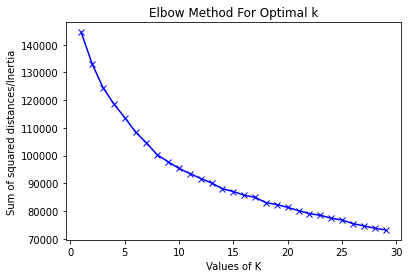

In [ ]:
Sum_of_squared_distances = []
K = range(1,30)
for num_clusters in K :
 clustering_model = KMeans(n_clusters=num_clusters)
 clustering_model.fit(corpus_embeddings)
 Sum_of_squared_distances.append(clustering_model.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    df_q = pd.DataFrame(cluster)
    df_q = df_q.replace(' ','_',regex =True)
    df_q.to_csv('metric_' + str(i+1)+'_.csv')


    print("Cluster ", i+1)
    print(cluster)
    print("")


Cluster  1
['burn rate', 'daily active deposits', 'emerging trends', 'eth spent over time', 'eth top transactions', 'gas used', 'get api calls made', 'mvrv ratio', 'news', 'nvt ratio', 'ohlc', 'ohlcv', 'price volume difference', 'prices', 'projects', 'realized value', 'token age consumed', 'token velocity', 'top holders percent of total supply', 'top transfers', 'uniswap top claimers', 'eth2 unlabeled staker inflow sources', 'eth2 staked amount per label', 'price histogram', 'eth2 staked address count per label', 'age distribution', 'eth2 top stakers', 'spent coins cost', 'amount in top holders', 'amount in non exchange top holders', 'price usd', 'price btc', 'volume usd', 'marketcap usd', 'nft retail trade volume usd', 'realized value usd 1d', 'busd bnb funding rates', 'circulation 2y', 'dormant circulation 90d', 'busd binance funding rate', 'daily avg marketcap usd', 'velocity', 'mvrv usd intraday 60d', 'total supply in profit', 'price daa divergence', 'mean dollar invested age', 'mv

# New section

# New section

In [ ]:
f = np.array(clustered_sentences)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
df_4 = pd.DataFrame(f)

In [ ]:
df_4 = df_4.replace(' ','_',regex =True)

In [ ]:
for i, cluster in enumerate(df_4):


,0
0,"[burn rate, daily active deposits, emerging tr..."
1,"[cexes to dex traders flow change 7d, age dest..."
2,"[ transform arg helper, circulation 1d, dexes ..."
3,"[average token age consumed in days, token cir..."
4,"[percent of whale stablecoin total supply, wha..."
5,"[exchange funds flow, historical balance, mine..."
6,"[mvrv usd 30d change 1d, other to cexes flow c..."
7,"[history twitter data, social dominance, socia..."
